In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('Auronplay_videos.csv')

In [3]:
# Reemplazar 'Subtitle not available' por valores nulos en la columna 'transcript'
df['transcript'] = df['transcript'].replace('Subtitle not available', pd.NA)

In [4]:
# Check for missing values
print(df.isnull().sum())

video_id        0
title           0
description     0
publish_date    0
likes           0
views           0
comments        0
transcript      2
dtype: int64


In [5]:
# Check for duplicates
print(df.duplicated().sum())

2


In [6]:
# Convert 'publish_date' to datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'])

In [7]:
# Extract features from 'publish_date'
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
df['day_of_week'] = df['publish_date'].dt.dayofweek
df['hour'] = df['publish_date'].dt.hour

In [8]:
# Create 'engagement rate'
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']

In [9]:
# Descriptive statistics
print(df.describe())

              likes         views       comments         year       month  \
count  3.510000e+02  3.510000e+02     351.000000   351.000000  351.000000   
mean   2.328499e+05  4.427076e+06    5029.860399  2021.586895    7.028490   
std    2.330183e+05  4.093930e+06   10328.090258     0.951840    3.651111   
min    4.113000e+04  5.647880e+05     461.000000  2019.000000    1.000000   
25%    1.117720e+05  2.061535e+06    1520.000000  2021.000000    3.000000   
50%    1.701750e+05  3.077356e+06    2103.000000  2022.000000    8.000000   
75%    2.386080e+05  5.011849e+06    4391.500000  2022.000000   10.000000   
max    2.466775e+06  3.080988e+07  135150.000000  2023.000000   12.000000   

       day_of_week        hour  engagement_rate  
count   351.000000  351.000000       351.000000  
mean      2.951567   17.720798         0.054778  
std       1.995836    3.975151         0.012048  
min       0.000000    0.000000         0.020489  
25%       1.000000   16.000000         0.047793  
50%   

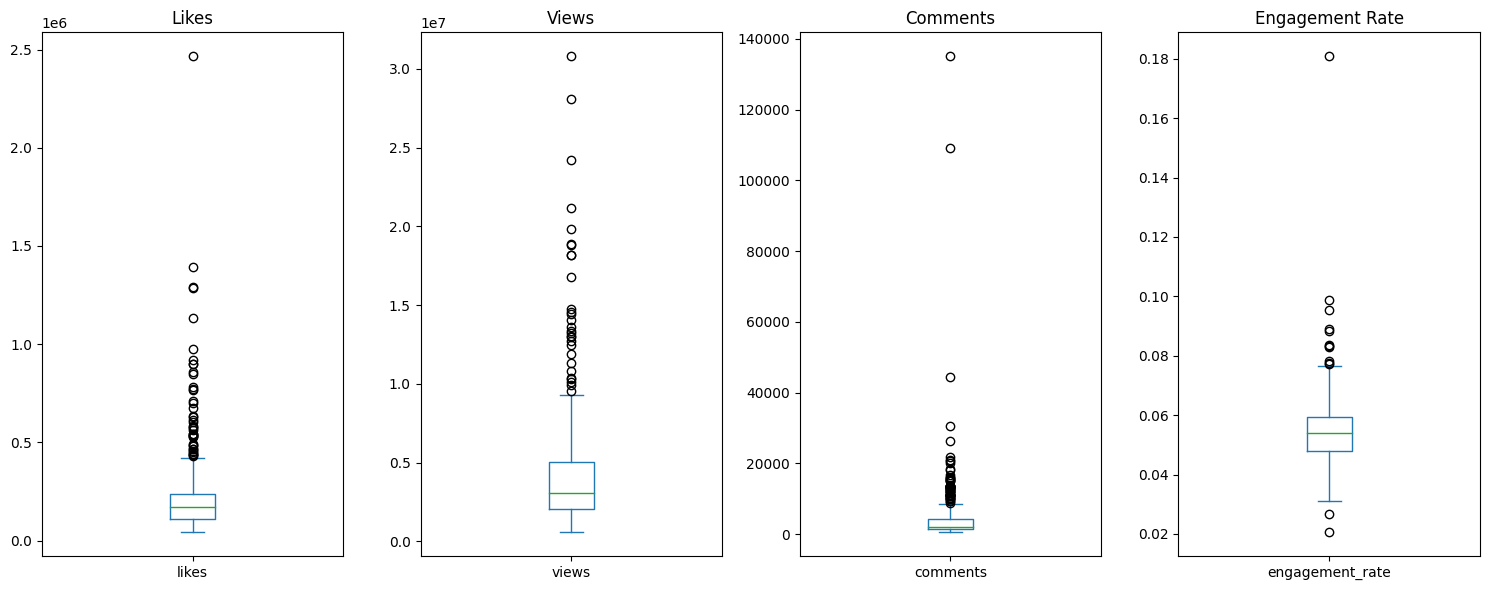

In [10]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

# Create box plots for each column and place them in the subplots
df['likes'].plot(kind='box', ax=axes[0])
df['views'].plot(kind='box', ax=axes[1])
df['comments'].plot(kind='box', ax=axes[2])
df['engagement_rate'].plot(kind='box', ax=axes[3])

# Set titles for subplots
axes[0].set_title('Likes')
axes[1].set_title('Views')
axes[2].set_title('Comments')
axes[3].set_title('Engagement Rate')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

array([[<AxesSubplot: title={'center': 'likes'}>,
        <AxesSubplot: title={'center': 'views'}>],
       [<AxesSubplot: title={'center': 'comments'}>,
        <AxesSubplot: title={'center': 'engagement_rate'}>]], dtype=object)

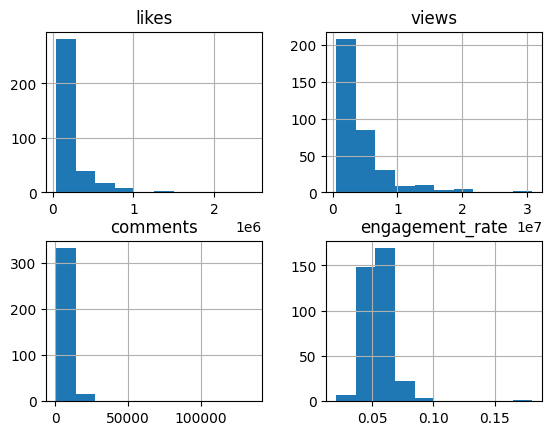

In [11]:
# Histograms
df[['likes', 'views', 'comments', 'engagement_rate']].hist()

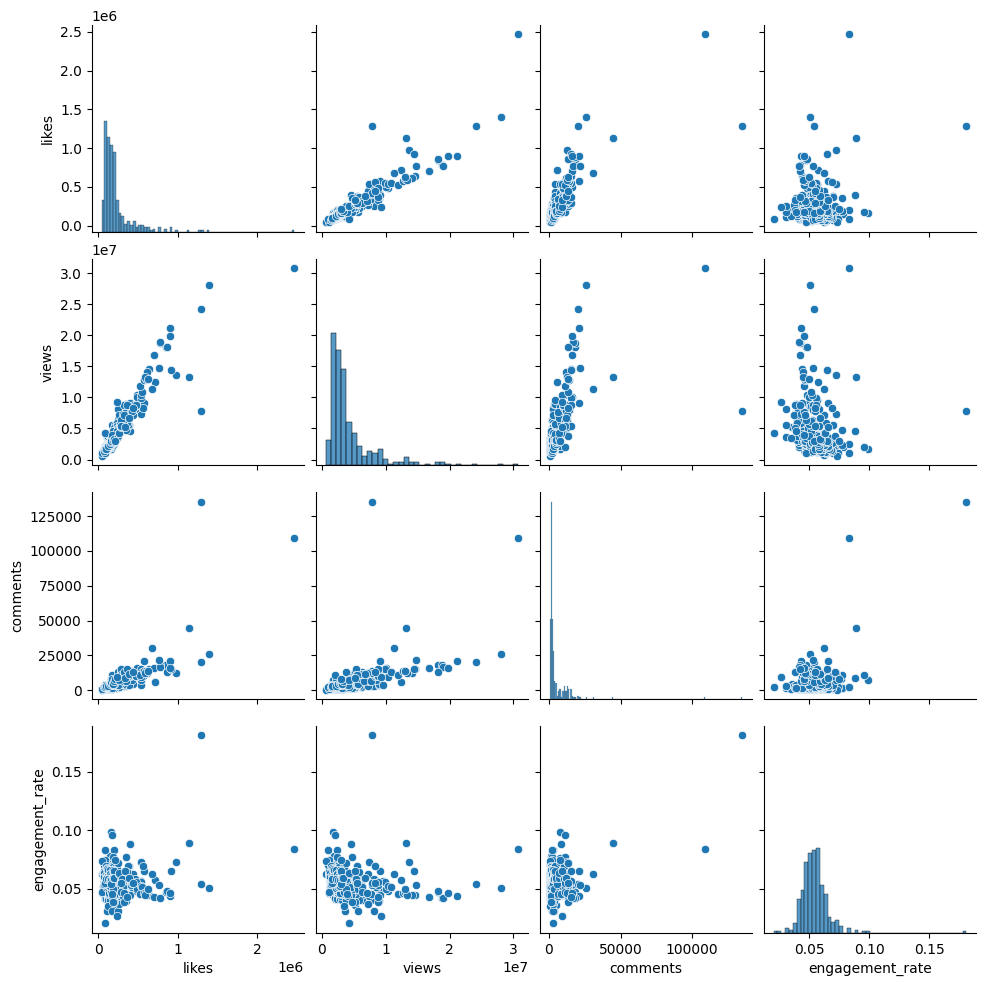

In [12]:
# Scatterplot matrix
sns.pairplot(df[['likes', 'views', 'comments', 'engagement_rate']])


<AxesSubplot: >

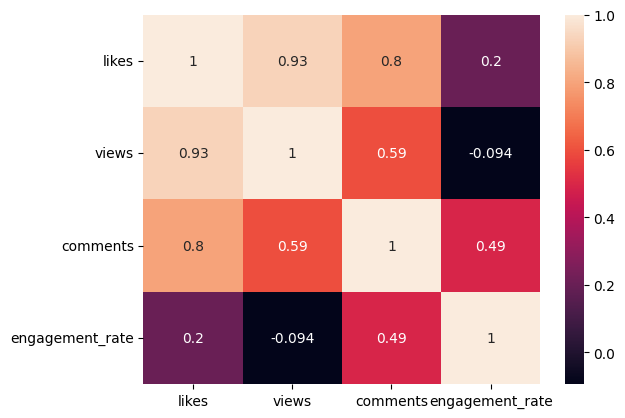

In [13]:
# Correlation matrix
corr_matrix = df[['likes', 'views', 'comments', 'engagement_rate']].corr()
sns.heatmap(corr_matrix, annot=True)

In [14]:
corr_matrix

,likes,views,comments,engagement_rate
likes,1.000000,0.929300,0.796293,0.203499
views,0.929300,1.000000,0.594294,-0.094116
comments,0.796293,0.594294,1.000000,0.492477
engagement_rate,0.203499,-0.094116,0.492477,1.000000


<AxesSubplot: xlabel='publish_date'>

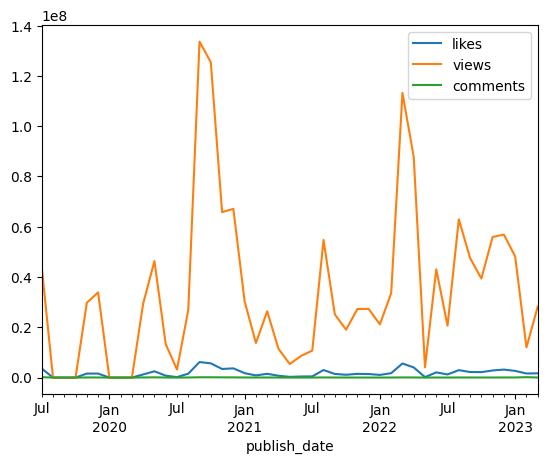

In [15]:
# Time series analysis
df.set_index('publish_date').resample('M')[['likes', 'views', 'comments']].sum().plot()

<AxesSubplot: xlabel='day_of_week'>

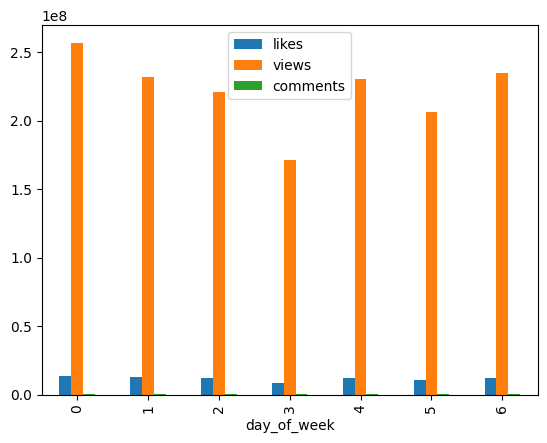

In [16]:
# Time series analysis by day of week
df.groupby('day_of_week')[['likes', 'views', 'comments']].sum().plot(kind='bar')

<AxesSubplot: xlabel='hour'>

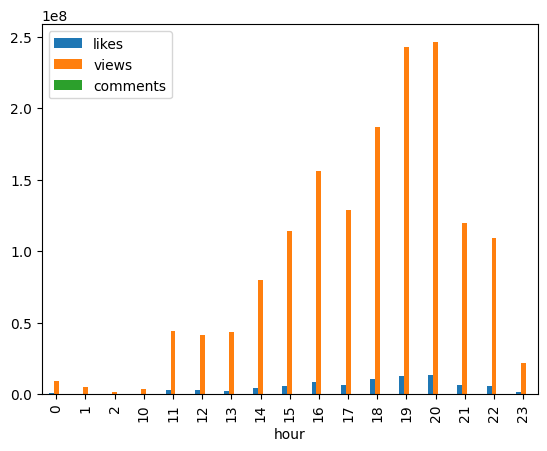

In [17]:
# Time series analysis by hour
df.groupby('hour')[['likes', 'views', 'comments']].sum().plot(kind='bar')

In [18]:
# Most popular videos
print(df[df['views'] == df['views'].max()]['title'])

350    mi primer ASMR espero k os guste - AuronPlay
Name: title, dtype: object
